<AxesSubplot:xlabel='DATE'>

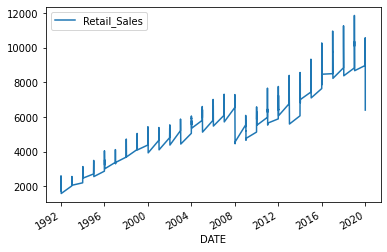

In [15]:
#Let’s start by importing all the required packages.
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

#Read the data set into a Pandas data frame. Note that the Date column (column 0) is the index column and it has the format mm-dd-yyyy.
df = pd.read_csv('retail_sales_used_car_dealers_us_1992_2020.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

#Set the index frequency explicitly to Monthly so that statsmodels does not have to try to infer it.
#df.index.freq = 'MS'

#Plot the data:
df.plot()
#plt.show()

In [ ]:
#Split between the training and the test data sets. The last 12 periods form the test data.
df_train = df.iloc[:-12]
df_test = df.iloc[-12:]

#the level of the time series seems to be increasing linearly. So we set the trend as additive. However, the seasonal variation around each level seems to be increasing in proportion to the current level. So we set the seasonality to multiplicative.
model = HWES(df_train, seasonal_periods=12, trend='add', seasonal='mul')
fitted = model.fit()

In [ ]:
#Print out the training summary.
print(fitted.summary())

In [12]:
#Create an out of sample forecast for the next 12 steps beyond the final data point in the training data set.
sales_forecast = fitted.forecast(steps=12)


C:\Users\Dhurvi\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [13]:
print(sales_forecast)

328    10356.821725
329    10108.749289
330     9948.541530
331    10156.788764
332     9247.916654
333     9399.463788
334     8763.046798
335     8545.284480
336     9010.702638
337    10328.183063
338    12084.679858
339    10208.011822
dtype: float64


In [14]:
df.tail(12)

,Retail_Sales
DATE,
2019-01-05,10549
2019-01-06,10078
2019-01-07,10255
2019-01-08,10357
2019-01-09,9404
2019-01-10,9696
2019-01-11,9355
2019-01-12,8669
2020-01-01,8971


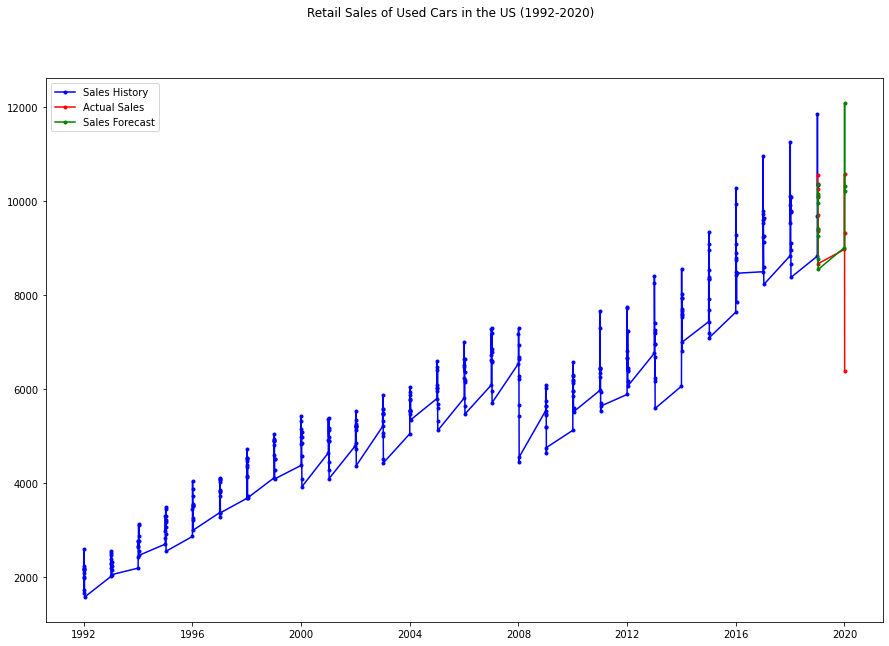

In [33]:
#plot the training data, the test data and the forecast on the same plot
fig = plt.figure(figsize=[15,10])
fig.suptitle('Retail Sales of Used Cars in the US (1992-2020)')
past, = plt.plot(df_train.index, df_train, 'b.-', label='Sales History')
future, = plt.plot(df_test.index, df_test, 'r.-', label='Actual Sales')
predicted_future, = plt.plot(df_test.index, sales_forecast, 'g.-', label='Sales Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()

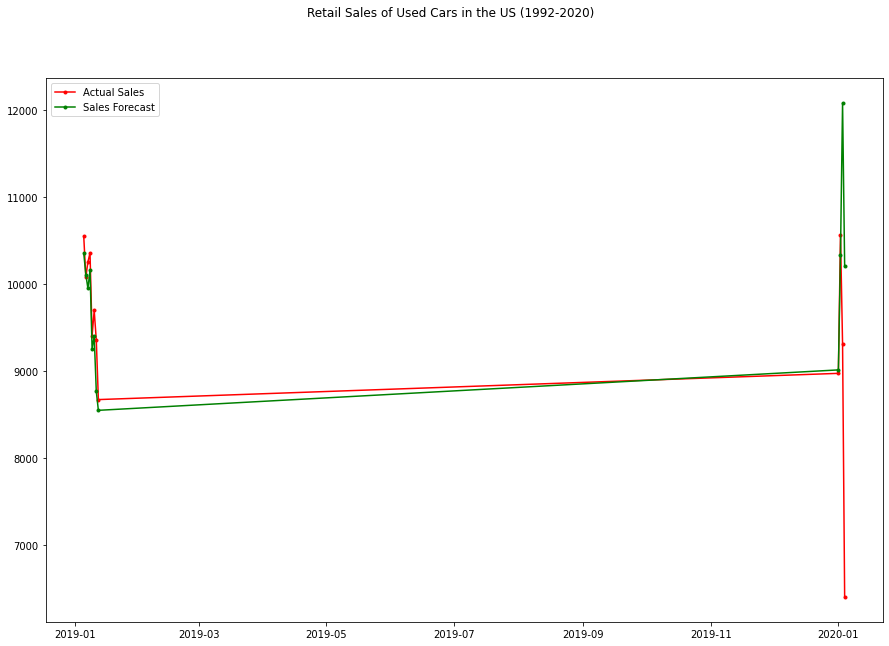

In [34]:
fig = plt.figure(figsize=[15,10])
fig.suptitle('Retail Sales of Used Cars in the US (1992-2020)')
#past, = plt.plot(df_train.index, df_train, 'b.-', label='Sales History')
future, = plt.plot(df_test.index, df_test, 'r.-', label='Actual Sales')
predicted_future, = plt.plot(df_test.index, sales_forecast, 'g.-', label='Sales Forecast')
plt.legend(handles=[future, predicted_future])
plt.show()

In [23]:
print(df_test.index)

DatetimeIndex(['2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04'],
              dtype='datetime64[ns]', name='DATE', freq=None)
